In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler

from sklearn.metrics import confusion_matrix

import matplotlib as mpl

In [3]:
loaded = np.load('../../Cleaned_up/data.npz')
y_valid = np.argmax(loaded['test_labels_cat'],axis=1)
y_valid
cmap = plt.cm.tab10


In [4]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [5]:
#name_list=['predictions_df_0','predictions_df_40']
#name_list=['predictions_df_0','predictions_df_50','predictions_df_100']
#name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']

name_list=['predictions_df_0','predictions_df_70','predictions_df_100']

#name_list=['predictions_df_10','predictions_df_20']

In [6]:
# query = {"$and": [
#            {"config.autoencoder_type": "nomal_dim_tied"},
          
#        ]}
# experiments=loader.find(query)
# #experiments=experiments[4:]

In [7]:
query = {"$or": [
            #{"_id": 3},
            #{"_id": 6}, 
            {"_id": 11}, 
            {"_id": 16},
            {"_id": 20},
            #{"_id": 33},
            #{"_id": 60},
            #{"_id": 61}, 
            {"_id": 64}, 
            {"_id": 65},
            #{"_id": 68},


        ],
        "$and": [
            {"$or": [
            {"config.autoencoder_type": "Over_dim"},
            {"config.autoencoder_type": "Over_dim_iteration"},
            {"config.autoencoder_type": "Over_dim_tied"},
            {"config.autoencoder_type": "Over_dim_tied_iteration"},
            
            {"config.autoencoder_type": "normal_dim"},
            {"config.autoencoder_type": "normal_dim_iteration"},
            {"config.autoencoder_type": "normal_dim_tied"},
            {"config.autoencoder_type": "normal_dim_tied_iteration"},
            ]},
            
            {"$or": [
            {"config.targets_type": "Mnist"},
            {"config.targets_type": "10_Targets"},
            {"config.targets_type": "Noisy"},
            ]},
            
            ],
          
        }
        
        
    
    
    
experiments=loader.find(query)

In [8]:
dtf=experiments.project(on=["config.targets_type","config.targets_type", "config.autoencoder_type", "config.batch_size"])
names=[" ".join(str(x) for x in dtf[['autoencoder_type','batch_size','targets_type']].iloc[n].values) for n in range(len(experiments))]

dtf

,targets_type,autoencoder_type,batch_size
exp_id,,,
11,Mnist,normal_dim,64
16,10_Targets,normal_dim,32
20,Mnist,Over_dim_iteration,32
64,10_Targets,Over_dim_tied_iteration,64
65,10_Targets,Over_dim_tied_iteration,32


In [9]:
names

['normal_dim 64 Mnist',
 'normal_dim 32 10_Targets',
 'Over_dim_iteration 32 Mnist',
 'Over_dim_tied_iteration 64 10_Targets',
 'Over_dim_tied_iteration 32 10_Targets']

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,fig,ax, title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """   

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    #print('Confusion matrix, without normalization')
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    title=title +' \n accuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)
    #print(cm)

    #fig, ax = plt.subplots()
    im = ax.imshow(cm,aspect='equal', interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(10)+0.05,
           yticks=np.arange(11)-0.5,
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    return ax


np.set_printoptions(precision=2)

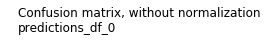

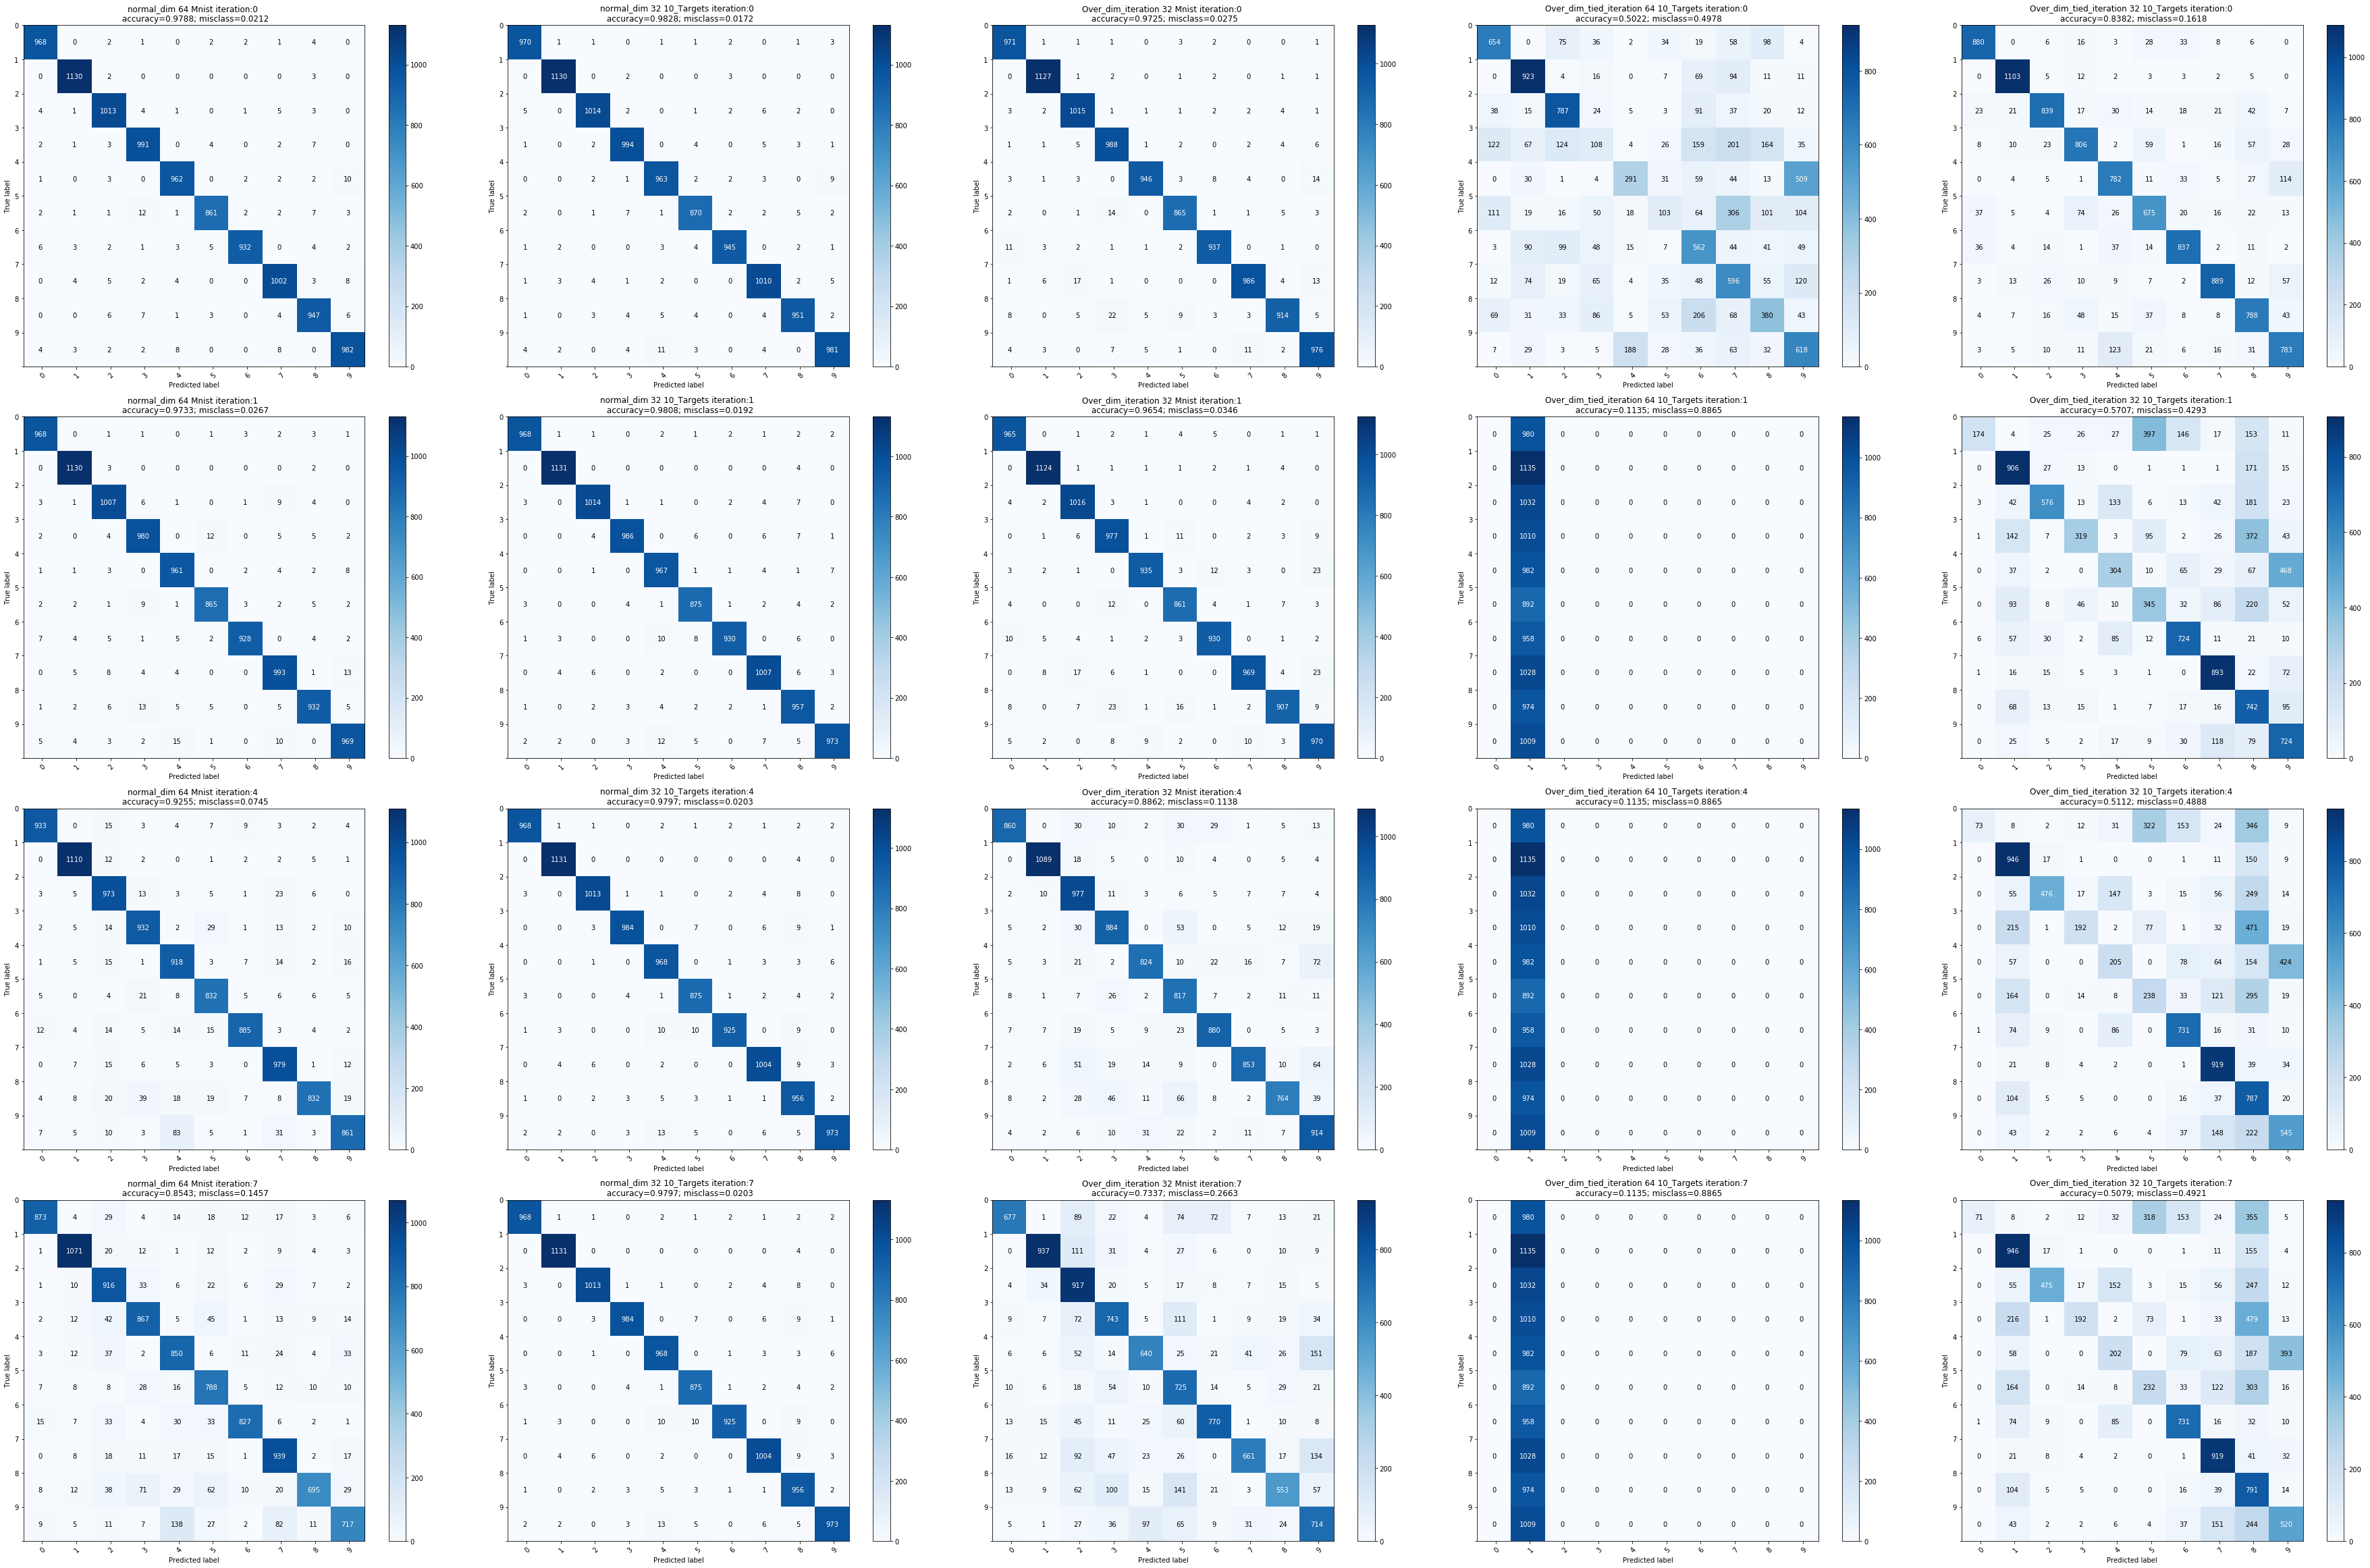

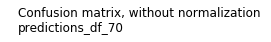

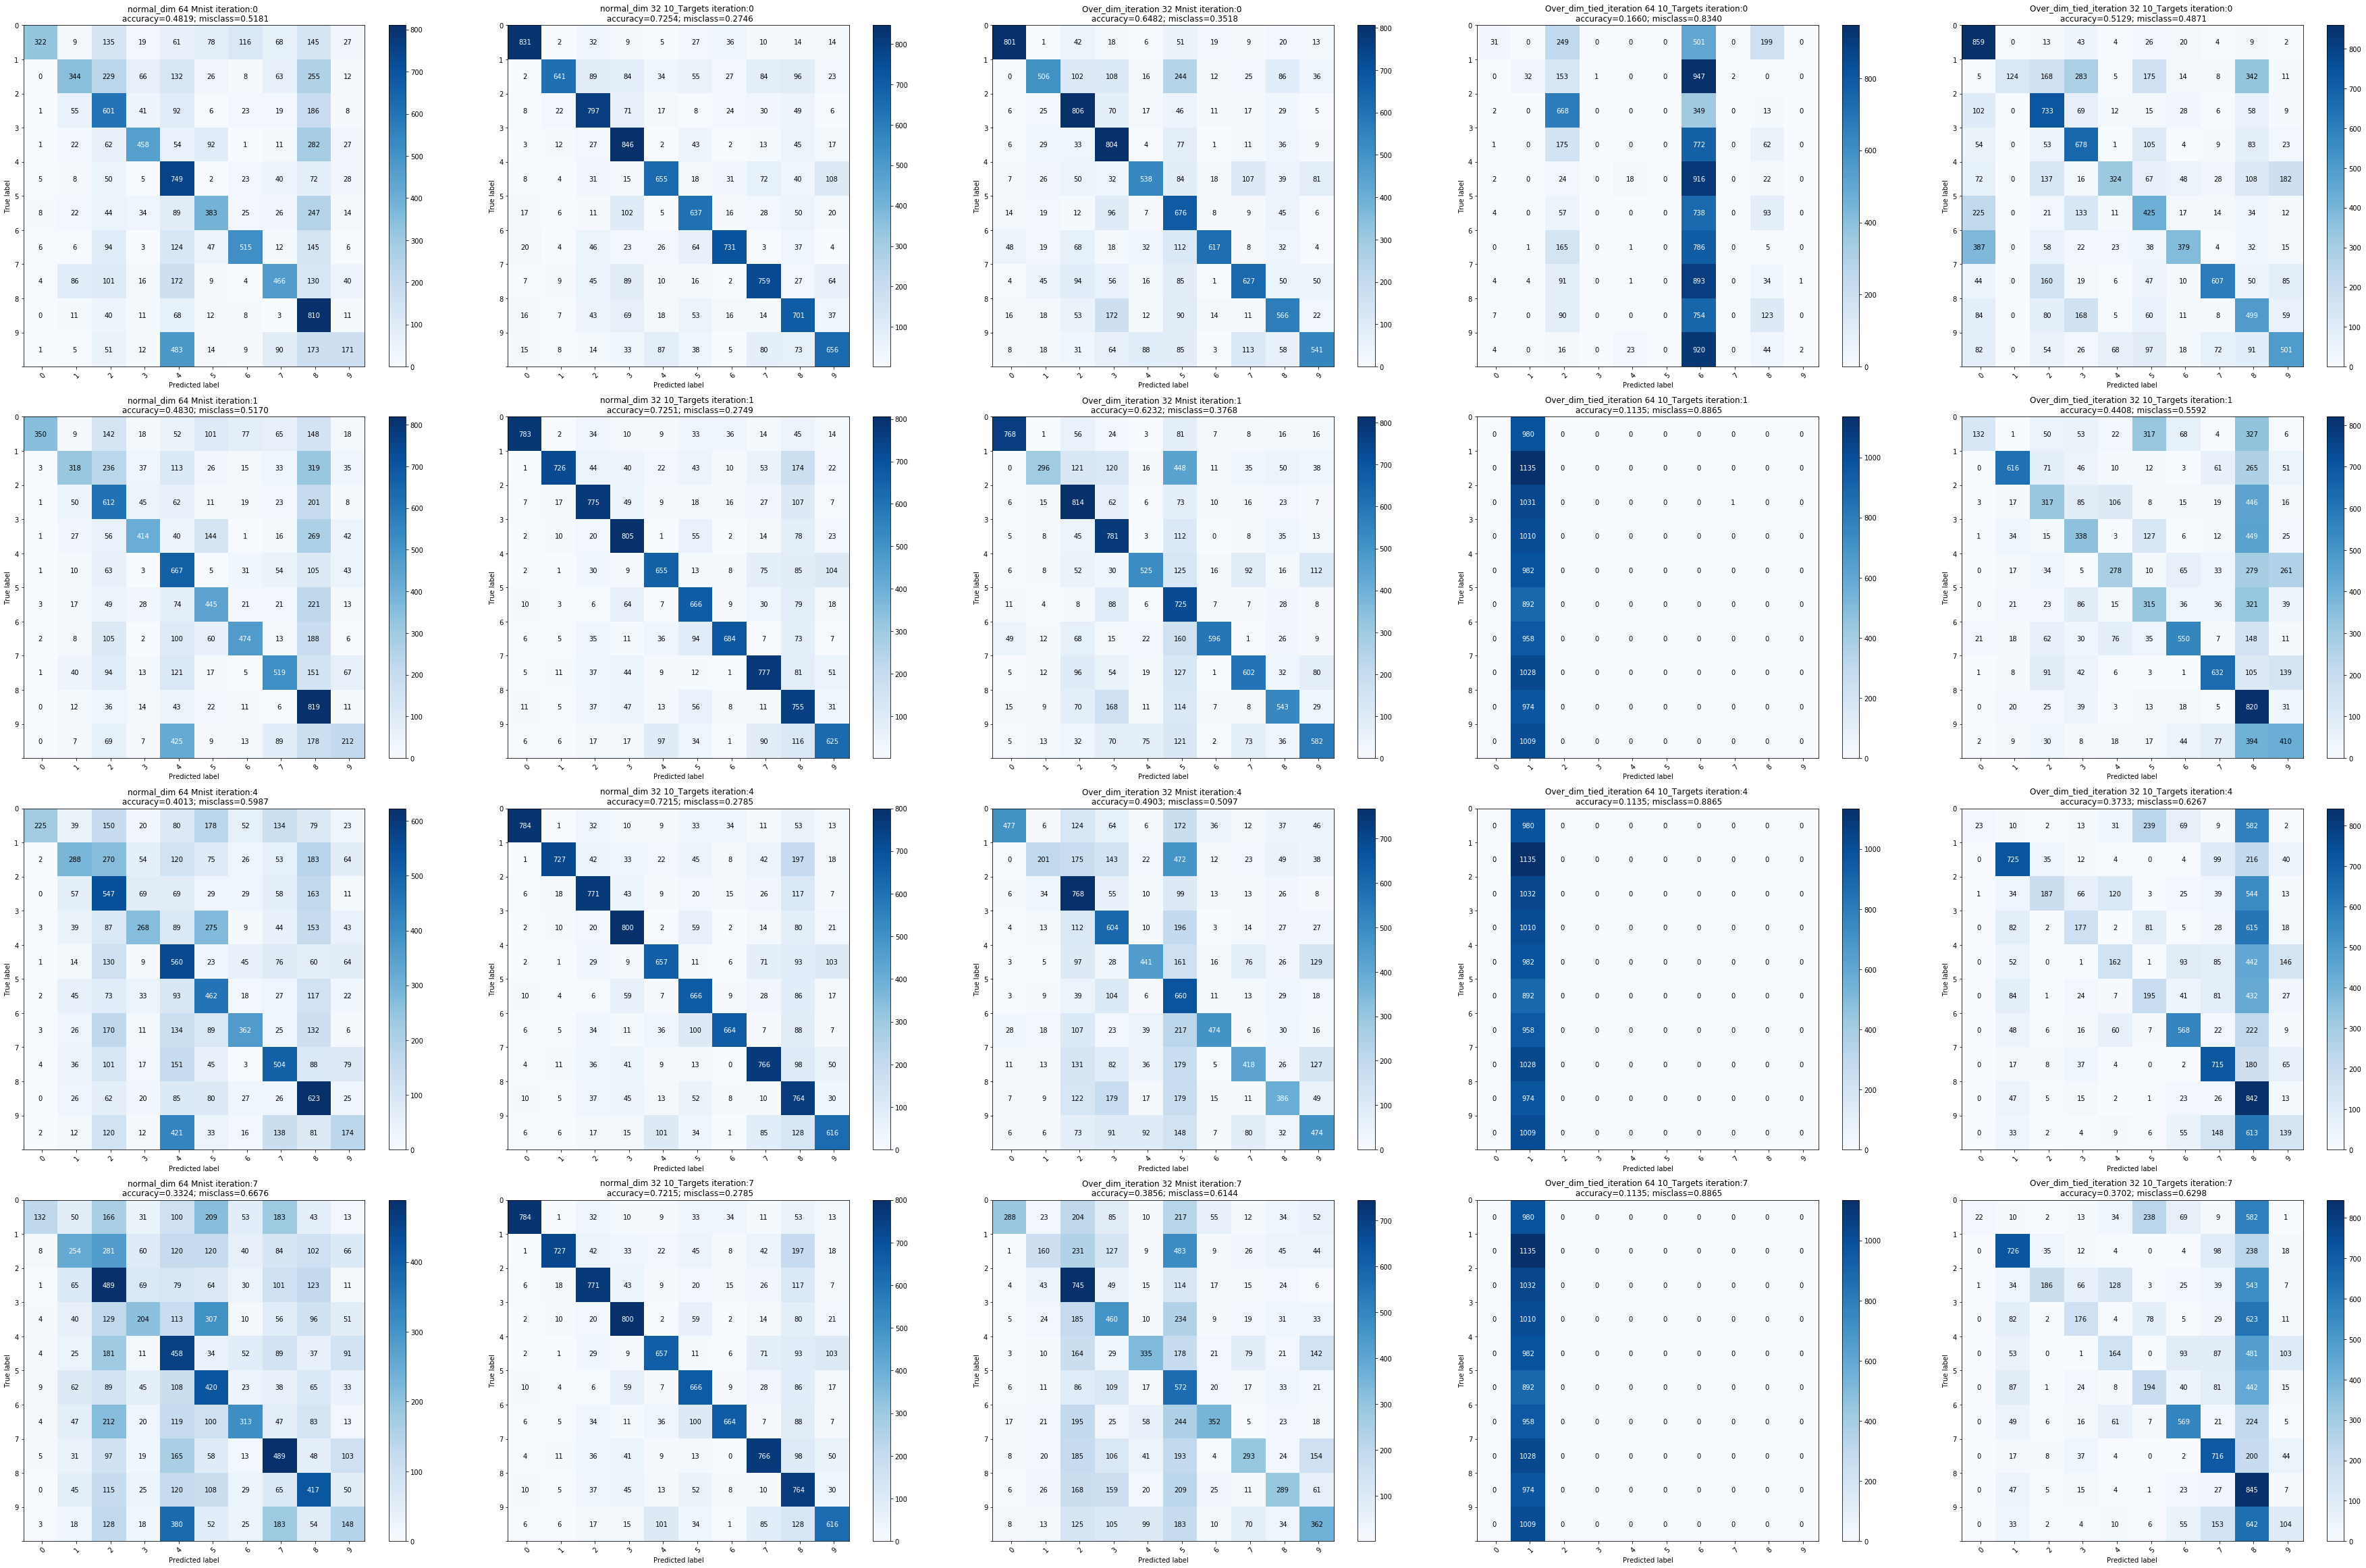

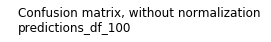

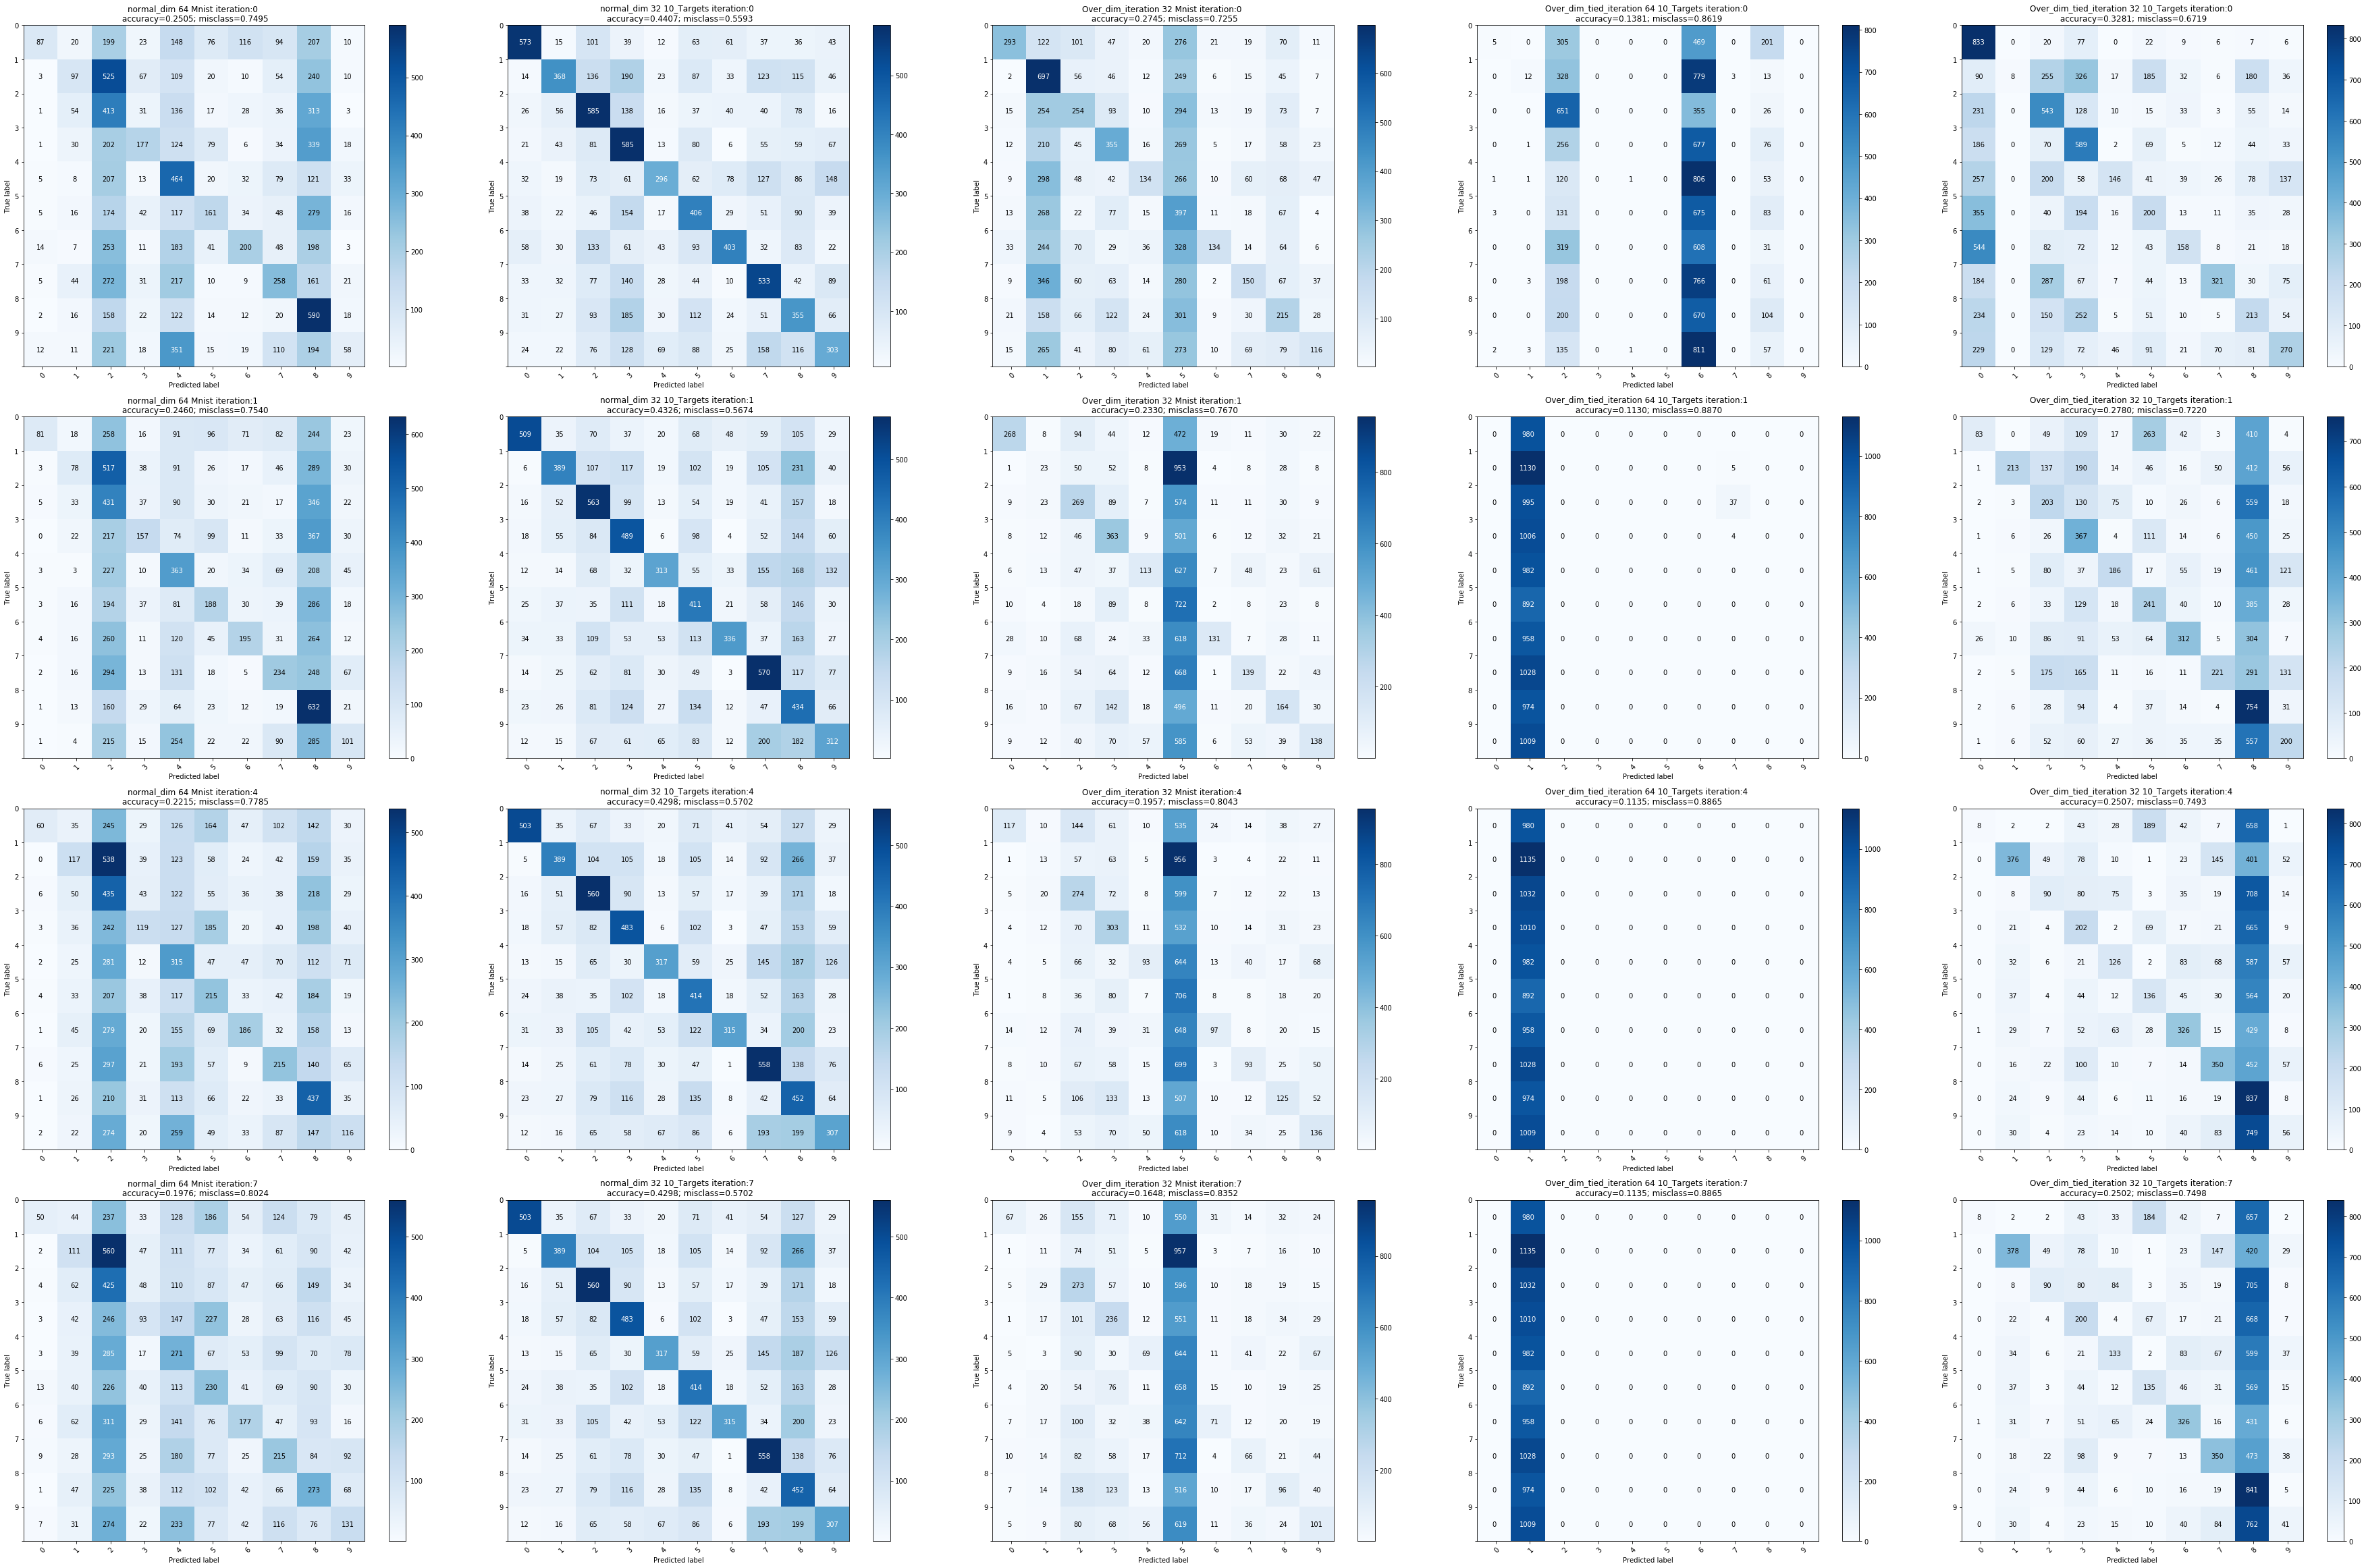

In [13]:
pos_x=len(experiments)
pos_y=5#8

for data in name_list:
######################## Loop over data list
    plt.figure(figsize=(2,0.5))
    plt.text(0.1, 0.1, ('Confusion matrix, without normalization \n'+data), fontsize=12) 
    plt.axis("off")

    plt.show()
        
    figs=plt.figure(figsize=(10*pos_x, 8*pos_y))



    ################# Loop Over experiments
    for n,exp in enumerate(experiments,1):
        
        ###################
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        j=0
        
        for i ,y_pred in enumerate(predictions['predicted_feature_classifier']):
            if i in [0,1,4,7]:
                j=j+1
                axs=plt.subplot(pos_y,pos_x,n+j*pos_x)
                plot_confusion_matrix(y_valid,y_pred.argmax(axis=1), classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],fig=figs,ax=axs,  title=(names[n-1]+' iteration:' + str(i)));
        pickle_artifact=[]
        predictions=[]
            

##################
    plt.show;